In [1]:
import warnings
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
# %matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import matplotlib.patches as mpatches
import matplotlib.markers as mmark
import matplotlib.lines as mlines

## Loading the CSV file

In [3]:
csv_file_location = './agg_metrics_with_PPL.csv'

In [4]:
df = pd.read_csv(csv_file_location)
df = df.drop(labels=7, axis=0)
df.head(10)

,size,lr,blk,epoch,has_head,PPL,mean_similarity_score,std_similarity_score,min_similarity_score,25%_similarity_score,...,exact_match_31,exact_match_35,exact_match_40,exact_match_42,exact_match_43,exact_match_46,exact_match_48,exact_match_52,exact_match_60,exact_match_64
0,gpt2-large,0.000010,1.0,2,True,15.6474,0.759818,0.208772,-0.061493,0.626077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gpt2-large,0.000010,1.0,4,True,15.5083,0.764234,0.206731,-0.103170,0.631576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gpt2-large,0.000010,1.0,6,True,15.5483,0.765074,0.205919,-0.034501,0.633796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gpt2-large,0.000050,1.0,1,True,16.5941,0.762883,0.208239,-0.066216,0.629650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gpt2-large,0.000050,1.0,2,True,16.4676,0.767022,0.205231,-0.108278,0.638266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,gpt2-large,0.000050,1.0,3,True,17.5447,0.773534,0.203369,-0.054935,0.646379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gpt2-large,0.000050,1.0,4,True,19.3573,0.777551,0.202307,-0.072243,0.652477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gpt2-large,0.000005,1.0,3,True,15.7113,0.760402,0.208497,-0.055880,0.626753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,gpt2-large,0.000005,1.0,6,True,15.5242,0.763167,0.207158,-0.055880,0.631739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,gpt2-large,0.000100,0.0,2,True,19.9030,0.753903,0.211418,-0.112273,0.615237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
lrs = [5e-6, 1e-5, 5e-5]

In [6]:
large_blk1_pp = []
large_blk1_em = []
large_blk1_ss = []
for lr in lrs:
    large_blk1_pp.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr)].PPL.to_numpy())
    large_blk1_em.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr)].mean_exact_match.to_numpy())
    large_blk1_ss.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr)].mean_similarity_score.to_numpy())
    
    
small_blk1_pp = []
small_blk1_em = []
small_blk1_ss = []
for lr in lrs:
    small_blk1_pp.append(df.loc[(df['size'] == 'gpt2') & (df['blk'] == 1) & (df['lr'] == lr)].PPL.to_numpy())
    small_blk1_em.append(df.loc[(df['size'] == 'gpt2') & (df['blk'] == 1) & (df['lr'] == lr)].mean_exact_match.to_numpy())
    small_blk1_ss.append(df.loc[(df['size'] == 'gpt2') & (df['blk'] == 1) & (df['lr'] == lr)].mean_similarity_score.to_numpy())
    
    
medium_blk1_pp = []
medium_blk1_em = []
medium_blk1_ss = []
for lr in lrs:
    medium_blk1_pp.append(df.loc[(df['size'] == 'gpt2-medium') & (df['blk'] == 1) & (df['lr'] == lr)].PPL.to_numpy())
    medium_blk1_em.append(df.loc[(df['size'] == 'gpt2-medium') & (df['blk'] == 1) & (df['lr'] == lr)].mean_exact_match.to_numpy())
    medium_blk1_ss.append(df.loc[(df['size'] == 'gpt2-medium') & (df['blk'] == 1) & (df['lr'] == lr)].mean_similarity_score.to_numpy())
    
    
xl_blk1_pp = []
xl_blk1_em = []
xl_blk1_ss = []
for lr in lrs:
    xl_blk1_pp.append(df.loc[(df['size'] == 'gpt2-xl') & (df['blk'] == 1) & (df['lr'] == lr)].PPL.to_numpy())
    xl_blk1_em.append(df.loc[(df['size'] == 'gpt2-xl') & (df['blk'] == 1) & (df['lr'] == lr)].mean_exact_match.to_numpy())
    xl_blk1_ss.append(df.loc[(df['size'] == 'gpt2-xl') & (df['blk'] == 1) & (df['lr'] == lr)].mean_similarity_score.to_numpy())
    

In [7]:
large_blk1_pp

[array([15.7113, 15.5242]),
 array([15.6474, 15.5083, 15.5483]),
 array([16.5941, 16.4676, 17.5447, 19.3573])]

## Model Size - Exact Match

In [8]:
lr_markers = [1, 2, 3]
lr_markersize = [5**n for n in [1.5, 2.5, 3]]
# lr_markersize = []

In [9]:
small_blk1_pp, lrs

([array([21.6222, 21.3069, 21.2389]),
  array([21.1841, 20.9824, 20.9132]),
  array([22.2072, 20.455 , 21.252 , 20.8141, 20.5576, 20.4132])],
 [5e-06, 1e-05, 5e-05])

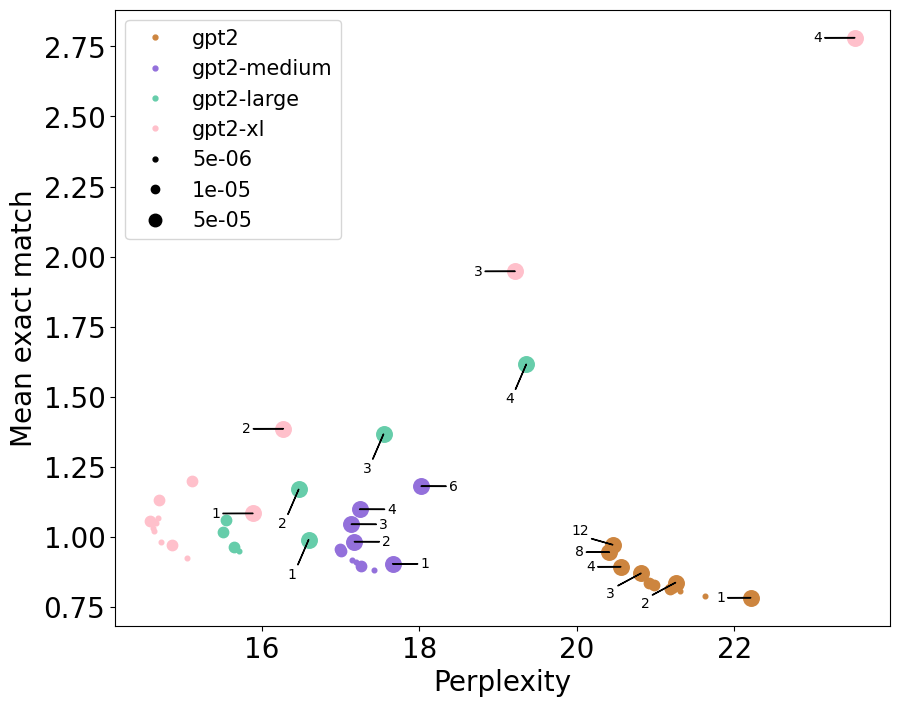

In [10]:
for i, lr in enumerate(lrs):
    plt.scatter(small_blk1_pp[i], small_blk1_em[i], c='peru', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(medium_blk1_pp[i], medium_blk1_em[i], c='mediumpurple', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(large_blk1_pp[i], large_blk1_em[i], c='mediumaquamarine', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(xl_blk1_pp[i], xl_blk1_em[i], c='pink', marker='o', s=lr_markersize[i])
    

epochs = [1, 2, 3, 4]
for i in range(len(xl_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (xl_blk1_pp[2][i], xl_blk1_em[2][i]), 
                 xytext=(-30, 5), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 2, 3, 4]
for i in range(len(large_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (large_blk1_pp[2][i], large_blk1_em[2][i]), 
                 xytext=(-15, -20), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 2, 3, 4, 6]
for i in range(len(medium_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (medium_blk1_pp[2][i], medium_blk1_em[2][i]), 
                 xytext=(20, 5), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 12, 2, 3, 4, 8]
coords = [(-25, 5), (-30, 15), (-25, -10), (-25, -10), (-25, 5), (-25, 5)]
for i in range(len(small_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (small_blk1_pp[2][i], small_blk1_em[2][i]), 
                 xytext=coords[i], 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
lr1_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=3.5, label=5e-6)
lr2_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=6, label=1e-5)
lr3_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=9, label=5e-5)

small_line = mlines.Line2D([], [], color='peru', marker='o', linestyle='None', markersize=3.5, label = 'gpt2')
medium_line = mlines.Line2D([], [], color='mediumpurple', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-medium')
large_line = mlines.Line2D([], [], color='mediumaquamarine', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-large')
xl_line = mlines.Line2D([], [], color='pink', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-xl')

plt.legend(handles=[small_line, medium_line, large_line, xl_line, lr1_legend, lr2_legend, lr3_legend], fontsize=15)
# plt.grid()
plt.xlabel('Perplexity', fontsize=20)
plt.ylabel('Mean exact match', fontsize=20)

# plt.annotate('Epoch', (16, 1), arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=1))

# plt.savefig('exact-match-size.pdf', format='pdf', dpi=1000)
plt.savefig('./plots/exact-match-size-ann.pdf', format='pdf', dpi=1000, bbox_inches='tight')


plt.show()
    

## Model Size - Semantic Similarity

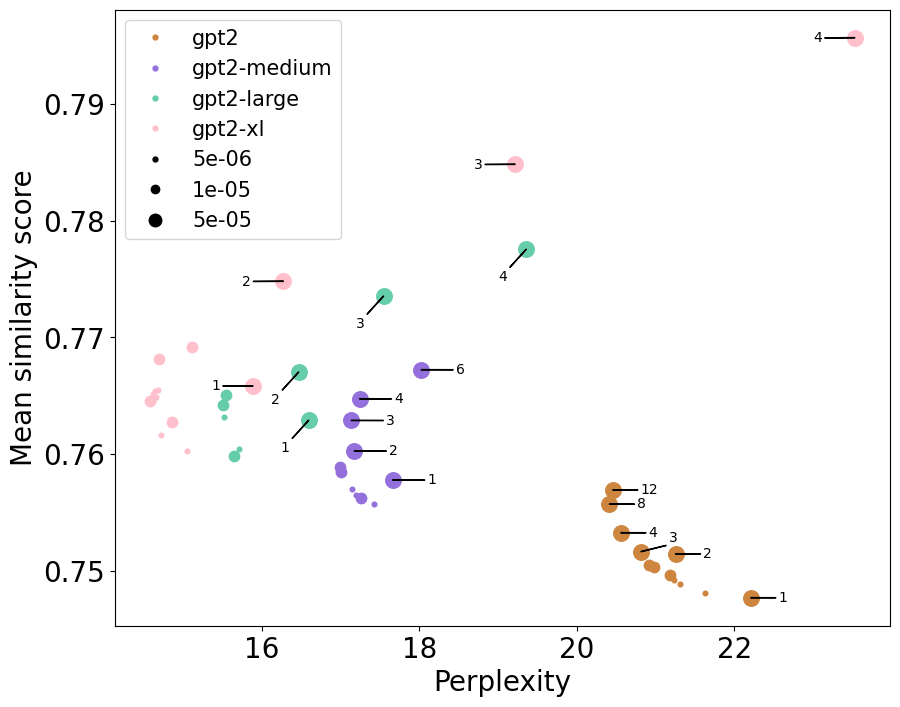

In [11]:
for i, lr in enumerate(lrs):
    plt.scatter(small_blk1_pp[i], small_blk1_ss[i], c='peru', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(medium_blk1_pp[i], medium_blk1_ss[i], c='mediumpurple', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(large_blk1_pp[i], large_blk1_ss[i], c='mediumaquamarine', marker='o', s=lr_markersize[i])
    
for i, lr in enumerate(lrs):
    plt.scatter(xl_blk1_pp[i], xl_blk1_ss[i], c='pink', marker='o', s=lr_markersize[i])
    
    
epochs = [1, 2, 3, 4]
for i in range(len(xl_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (xl_blk1_pp[2][i], xl_blk1_ss[2][i]), 
                 xytext=(-30, -3), 
                 xycoords='data',
                 textcoords='offset points',
                 # va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 2, 3, 4]
for i in range(len(large_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (large_blk1_pp[2][i], large_blk1_ss[2][i]), 
                 xytext=(-20, -15), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 2, 3, 4, 6]
for i in range(len(medium_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (medium_blk1_pp[2][i], medium_blk1_ss[2][i]), 
                 xytext=(25, 5), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
epochs = [1, 12, 2, 3, 4, 8]
coords = [(20, 5), (20, 5), (20, 5), (20, 15), (20, 5), (20, 5)]
for i in range(len(small_blk1_pp[2])):
    plt.annotate(f'{epochs[i]}', (small_blk1_pp[2][i], small_blk1_ss[2][i]), 
                 xytext=coords[i], 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
        

lr1_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=3.5, label=5e-6)
lr2_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=6, label=1e-5)
lr3_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=9, label=5e-5)

small_line = mlines.Line2D([], [], color='peru', marker='o', linestyle='None', markersize=3.5, label = 'gpt2')
medium_line = mlines.Line2D([], [], color='mediumpurple', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-medium')
large_line = mlines.Line2D([], [], color='mediumaquamarine', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-large')
xl_line = mlines.Line2D([], [], color='pink', marker='o', linestyle='None', markersize=3.5, label = 'gpt2-xl')

plt.legend(handles=[small_line, medium_line, large_line, xl_line, lr1_legend, lr2_legend, lr3_legend], fontsize=15)
# plt.grid()
plt.xlabel('Perplexity', fontsize=20)
plt.ylabel('Mean similarity score', fontsize=20)

# plt.savefig('similarity-score-size.pdf', format='pdf', dpi=1000)
plt.savefig('./plots/similarity-score-size-ann.pdf', format='pdf', dpi=1000, bbox_inches='tight')



plt.show()
    

## BLK - Exact Match

In [12]:
lrs1 = df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1)].lr.unique()
print (lrs)
large_blk1_pp = []
large_blk1_em = []
large_blk1_ss = []
for lr in lrs1:
    large_blk1_pp.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr) & (df['has_head'] == True)].PPL.to_numpy())
    large_blk1_em.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr) & (df['has_head'] == True)].mean_exact_match.to_numpy())
    large_blk1_ss.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 1) & (df['lr'] == lr) & (df['has_head'] == True)].mean_similarity_score.to_numpy())
    
lrs7 = df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.7)].lr.unique()
print (lrs)
large_blk7_pp = []
large_blk7_em = []
large_blk7_ss = []
for lr in lrs7:
    large_blk7_pp.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.7) & (df['lr'] == lr) & (df['has_head'] == True)].PPL.to_numpy())
    large_blk7_em.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.7) & (df['lr'] == lr) & (df['has_head'] == True)].mean_exact_match.to_numpy())
    large_blk7_ss.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.7) & (df['lr'] == lr) & (df['has_head'] == True)].mean_similarity_score.to_numpy())
    
lrs4 = df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.4)].lr.unique()
print (lrs)
large_blk4_pp = []
large_blk4_em = []
large_blk4_ss = []
for lr in lrs4:
    large_blk4_pp.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.4) & (df['lr'] == lr) & (df['has_head'] == True)].PPL.to_numpy())
    large_blk4_em.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.4) & (df['lr'] == lr) & (df['has_head'] == True)].mean_exact_match.to_numpy())
    large_blk4_ss.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0.4) & (df['lr'] == lr) & (df['has_head'] == True)].mean_similarity_score.to_numpy())
    
lrs0 = df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0)].lr.unique()
print (lrs)
large_blk0_pp = []
large_blk0_em = []
large_blk0_ss = []
for lr in lrs0:
    large_blk0_pp.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0) & (df['lr'] == lr) & (df['has_head'] == True)].PPL.to_numpy())
    large_blk0_em.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0) & (df['lr'] == lr) & (df['has_head'] == True)].mean_exact_match.to_numpy())
    large_blk0_ss.append(df.loc[(df['size'] == 'gpt2-large') & (df['blk'] == 0) & (df['lr'] == lr) & (df['has_head'] == True)].mean_similarity_score.to_numpy())
    

[5e-06, 1e-05, 5e-05]
[5e-06, 1e-05, 5e-05]
[5e-06, 1e-05, 5e-05]
[5e-06, 1e-05, 5e-05]


In [13]:
large_blk1_pp, lrs1

([array([15.6474, 15.5083, 15.5483]),
  array([16.5941, 16.4676, 17.5447, 19.3573]),
  array([15.7113, 15.5242])],
 array([1.e-05, 5.e-05, 5.e-06]))

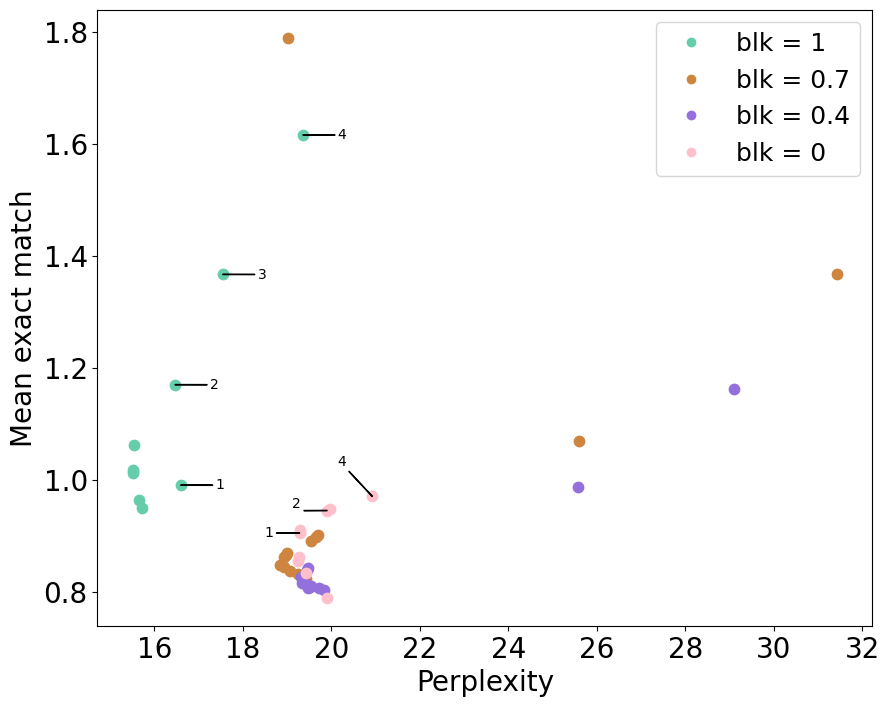

In [14]:
markersize = 5**2.5

for i, lr in enumerate(lrs1):
    plt.scatter(large_blk1_pp[i], large_blk1_em[i], c='mediumaquamarine', s = markersize)
    # lr_legends.append(lr)
    
for i, lr in enumerate(lrs7):
    plt.scatter(large_blk7_pp[i], large_blk7_em[i], c='peru', s = markersize)

for i, lr in enumerate(lrs4):
    plt.scatter(large_blk4_pp[i], large_blk4_em[i], c='mediumpurple', s = markersize)

for i, lr in enumerate(lrs0):
    plt.scatter(large_blk0_pp[i], large_blk0_em[i], c='pink', s = markersize)
    
epochs = [1, 2, 3, 4]
for i in range(len(large_blk1_pp[1])):
    plt.annotate(f'{epochs[i]}', (large_blk1_pp[1][i], large_blk1_em[1][i]), 
                 xytext=(25, 5), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
# epochs = [3, 4, 5, 1]
# coords = [(-35, 50), (-25, 50), (-5, 50), (-25, 50)]
# for i in range(len(large_blk7_pp[1])):
#     plt.annotate(f'{epochs[i]}', (large_blk7_pp[1][i], large_blk7_em[1][i]), 
#                  xytext=coords[i], 
#                  xycoords='data',
#                  textcoords='offset points',
#                  va='top', ha='left',
#                  arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
    
# epochs = [2, 4, 5, 1]
# coords = [(50, -15), (50, -10), (50, 5), (50, -20)]
# for i in range(len(large_blk4_pp[1])):
#     plt.annotate(f'{epochs[i]}', (large_blk4_pp[1][i], large_blk4_em[1][i]), 
#                  xytext=coords[i], 
#                  xycoords='data',
#                  textcoords='offset points',
#                  va='top', ha='left',
#                  arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))

    
    
epochs = [2, 4, 1]
coords = [(-25, 10), (-25, 30), (-25, 5)]
for i in range(len(large_blk0_pp[0])):
    plt.annotate(f'{epochs[i]}', (large_blk0_pp[0][i], large_blk0_em[0][i]), 
                 xytext=coords[i], 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))

    
line1 = mlines.Line2D([], [], color='mediumaquamarine', marker='o', linestyle='None', markersize=6, label = 'blk = 1')
line7 = mlines.Line2D([], [], color='peru', marker='o', linestyle='None', markersize=6, label = 'blk = 0.7')
line4 = mlines.Line2D([], [], color='mediumpurple', marker='o', linestyle='None', markersize=6, label = 'blk = 0.4')
line0 = mlines.Line2D([], [], color='pink', marker='o', linestyle='None', markersize=6, label = 'blk = 0')
    

# color1 = mpatches.Patch(color='k', label='blk = 1')
# color2 = mpatches.Patch(color='red', label='blk = 0.7')
# color3 = mpatches.Patch(color='blue', label='blk = 0.4')
# color4 = mpatches.Patch(color='pink', label='blk = 0')


plt.legend(handles=[line1, line7, line4, line0], fontsize=18)
    
plt.xlabel('Perplexity', fontsize=20)
plt.ylabel('Mean exact match', fontsize=20)
# plt.grid()
    
# plt.savefig('exact-match-blk.pdf', format='pdf', dpi=1000)
plt.savefig('./plots/exact-match-blk-ann.pdf', format='pdf', dpi=1000, bbox_inches='tight')

    
    
plt.show()
    
    

### BLK - Semantic Similarity

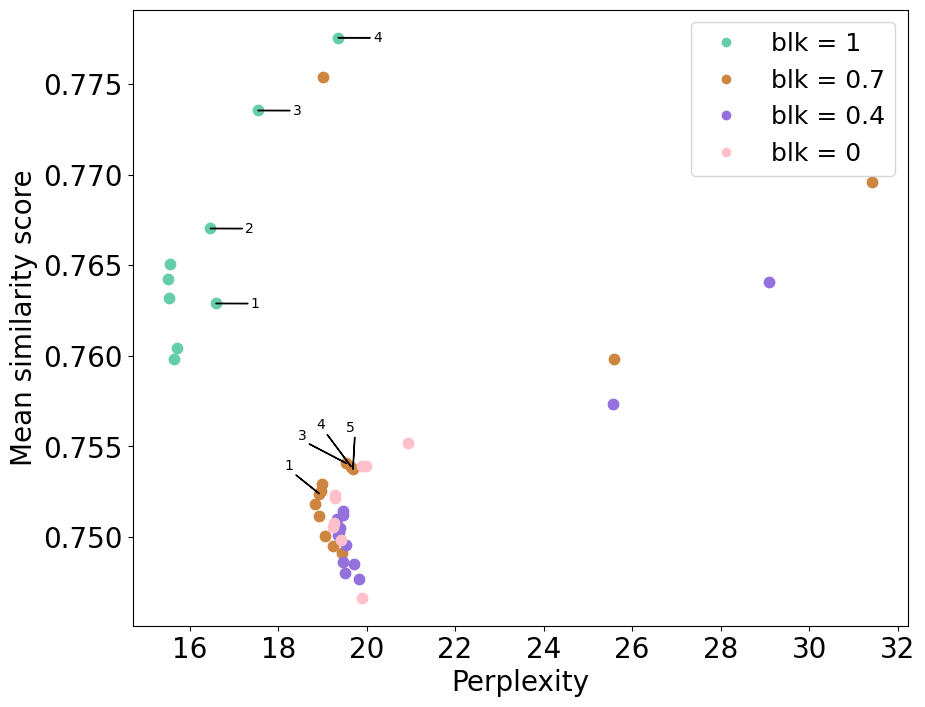

In [15]:
markersize = 5**2.5

for i, lr in enumerate(lrs1):
    plt.scatter(large_blk1_pp[i], large_blk1_ss[i], c='mediumaquamarine', s = markersize)
    # lr_legends.append(lr)
    
for i, lr in enumerate(lrs7):
    plt.scatter(large_blk7_pp[i], large_blk7_ss[i], c='peru', s = markersize)
    
for i, lr in enumerate(lrs4):
    plt.scatter(large_blk4_pp[i], large_blk4_ss[i], c='mediumpurple', s = markersize)
    
for i, lr in enumerate(lrs0):
    plt.scatter(large_blk0_pp[i], large_blk0_ss[i], c='pink', s = markersize)
    

epochs = [1, 2, 3, 4]
for i in range(len(large_blk1_pp[1])):
    plt.annotate(f'{epochs[i]}', (large_blk1_pp[1][i], large_blk1_ss[1][i]), 
                 xytext=(25, 5), 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
        

epochs = [3, 4, 5, 1]
coords = [(-35, 25), (-25, 35), (-5, 35), (-25, 25)]
for i in range(len(large_blk7_pp[1])):
    plt.annotate(f'{epochs[i]}', (large_blk7_pp[1][i], large_blk7_ss[1][i]), 
                 xytext=coords[i], 
                 xycoords='data',
                 textcoords='offset points',
                 va='top', ha='left',
                 arrowprops=dict(facecolor='black', width=0.2, headwidth=0.1, headlength=0.1))
    
        
    
line1 = mlines.Line2D([], [], color='mediumaquamarine', marker='o', linestyle='None', markersize=6, label = 'blk = 1')
line7 = mlines.Line2D([], [], color='peru', marker='o', linestyle='None', markersize=6, label = 'blk = 0.7')
line4 = mlines.Line2D([], [], color='mediumpurple', marker='o', linestyle='None', markersize=6, label = 'blk = 0.4')
line0 = mlines.Line2D([], [], color='pink', marker='o', linestyle='None', markersize=6, label = 'blk = 0')
    

# color1 = mpatches.Patch(color='k', label='blk = 1')
# color2 = mpatches.Patch(color='red', label='blk = 0.7')
# color3 = mpatches.Patch(color='blue', label='blk = 0.4')
# color4 = mpatches.Patch(color='pink', label='blk = 0')


plt.legend(handles=[line1, line7, line4, line0], fontsize=18)
    
plt.xlabel('Perplexity', fontsize=20)
plt.ylabel('Mean similarity score', fontsize=20)
# plt.grid()
    
# plt.savefig('similarity-score-blk.pdf', format='pdf', dpi=1000)
plt.savefig('./plots/similarity-score-blk-ann.pdf', format='pdf', dpi=1000, bbox_inches='tight')


    
plt.show()
    
    